<a href="https://colab.research.google.com/github/Muhia3/EmotionsDetection/blob/main/facialExpression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
print("hello world ")

hello world 


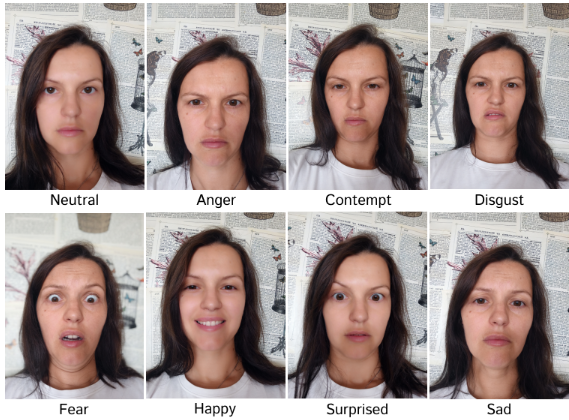

In [ ]:
"""
The dataset's possible applications:
Automatic emotion detection
Mental health analysis
Artificial intelligence (AI) and computer vision
Entertainment industries
Advertising and market research
Security and surveillance
"""

"\nThe dataset's possible applications:\nAutomatic emotion detection\nMental health analysis\nArtificial intelligence (AI) and computer vision\nEntertainment industries\nAdvertising and market research\nSecurity and surveillance\n"

###Import the dependancies

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

print ("The libraries are successufuly loaaded")

The libraries are successufuly loaaded


###Facial Emotion Recognition Dataset

In [ ]:
import tensorflow as tf
from google.colab import files
from IPython.display import Image

In [ ]:
from pathlib import Path
from tensorflow.keras.preprocessing.image import ImageDataGenerator,DirectoryIterator

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import load_img

In [ ]:
folder_path = "/content/drive/MyDrive/emotions.zip"

In [ ]:
import zipfile

In [ ]:
folder_path = "/content/drive/MyDrive/emotions.zip"
expression = 'disgust'
picture_size = 48

# Creating a directory to extract the zip file contents
extract_path = "/content/emotions"
os.makedirs(extract_path, exist_ok=True)

# Extract the zip file
with zipfile.ZipFile(folder_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)


###Making Train amd Validation

In [ ]:
batch_size  = 128

datagen_train  = ImageDataGenerator()
datagen_val = ImageDataGenerator()


In [ ]:

folder_path = extract_path



train_set = datagen_train.flow_from_directory(folder_path,
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=True)


test_set = datagen_val.flow_from_directory(folder_path,
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=False)

Found 71774 images belonging to 1 classes.
Found 71774 images belonging to 1 classes.


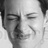

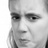

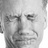

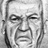

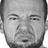

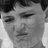

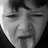

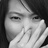

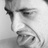

In [ ]:
import os
from IPython.display import Image, display


images_folder = 'emotions/images/train'
disgust_folder = os.path.join(images_folder, 'disgust')


if os.path.exists(disgust_folder):
    image_files = [f for f in os.listdir(disgust_folder) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
    for image_file in image_files[:9]:
        display(Image(filename=os.path.join(disgust_folder, image_file)))
else:
    print(f"Folder not found: {disgust_folder}")

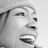

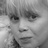

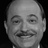

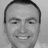

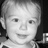

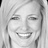

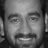

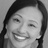

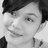

In [ ]:
images_folder = 'emotions/images/train'
happy_folder = os.path.join(images_folder, 'happy')


if os.path.exists(happy_folder):
    image_files = [f for f in os.listdir(happy_folder) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
    for image_file in image_files[:9]:
        display(Image(filename=os.path.join(happy_folder, image_file)))
else:
    print(f"Folder not found: {happy_folder}")


 ANGRY Images:


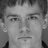

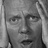

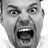

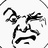

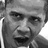

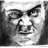

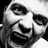

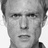


 DISGUST Images:


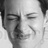

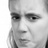

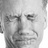

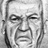

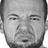

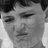

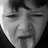

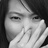


 FEAR Images:


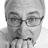

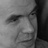

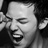

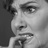

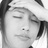

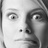

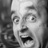

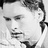


 HAPPY Images:


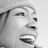

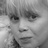

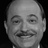

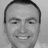

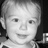

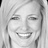

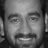

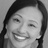


 NEUTRAL Images:


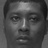

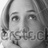

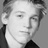

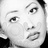

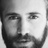

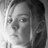

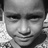

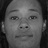


 SAD Images:


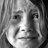

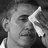

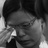

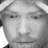

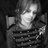

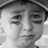

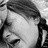

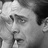


 SURPRISE Images:


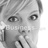

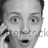

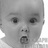

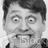

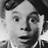

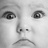

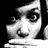

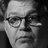

In [ ]:
images_folder = 'emotions/images/train'
emotions = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

for emotion in emotions:
    emotion_folder = os.path.join(images_folder, emotion)
    if os.path.exists(emotion_folder):
        print(f"\n {emotion.upper()} Images:")
        image_files = [f for f in os.listdir(emotion_folder) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
        for image_file in image_files[:8]:  # Show first 3 images per emotion
            display(Image(filename=os.path.join(emotion_folder, image_file)))

###Model creation

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, BatchNormalization, Activation, MaxPooling2D, Dropout
from keras.optimizers import Adam, SGD, RMSprop

In [ ]:
no_of_classes = 7

model = Sequential()

In [ ]:

#1st CNN layer
model.add(Conv2D(64,(3,3),padding = 'same',input_shape = (48,48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
#2nd CNN layer
model.add(Conv2D(128,(5,5),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#3rd CNN layer
model.add(Conv2D(512,(3,3),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))


In [ ]:
#4th CNN layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))



In [ ]:
from tensorflow.keras.layers import Flatten, Dense, BatchNormalization, Activation, Dropout, Conv2D, MaxPooling2D
model.add(Flatten())


In [ ]:
#Fully connected 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))


# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(no_of_classes, activation='softmax'))




In [ ]:

opt = Adam(learning_rate=0.0001)
model.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 48, 48, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 48, 48, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_11 (Activation)      │ (None, 48, 48, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 24, 24, 128)    │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 24, 24, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_12 (Activation)      │ (None, 24, 24, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 12, 12, 512)    │       590,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 12, 12, 512)    │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_13 (Activation)      │ (None, 12, 12, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 6, 6, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 6, 6, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_14 (Activation)      │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 3, 3, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 3, 3, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 256)            │     1,179,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 256)            │         1,02

 Total params: 4,478,727 (17.08 MB)

 Trainable params: 4,474,759 (17.07 MB)

 Non-trainable params: 3,968 (15.50 KB)

###Fitting the Model with Training and Validation Data



In [ ]:
import tensorflow as tf


dataset = tf.keras.preprocessing.image_dataset_from_directory(
    'emotions/images/train',
    image_size=(48, 48),
    batch_size=32,
    validation_split=0.2,
    subset='both',
    seed=42
)

train_set, val_set = dataset

Found 28821 files belonging to 7 classes.
Using 23057 files for training.
Using 5764 files for validation.
